<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/AJUBA_XGBOOST_WITH_TREESHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.15

    100% |████████████████████████████████| 13.9MB 2.5MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.2 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:

## Uncomment these lines if running as a google colab notebook: 
! git clone https://github.com/kundajelab/adar_editing
import os
os.chdir("adar_editing/xgboost_with_shap/")
!pip install shap
!pip install --upgrade xgboost
!pip install cufflinks


In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [3]:
#helper utilities for model training and interpretation 
import shap
from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.plotly as py
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap

import feature_subsets
import xgboost


/users/annashch/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



## Neil1 xgboost with TreeShap <a name='outline'>
<ol>
    <li><a href=#1>Computational Dataset</a></li>
    <li><a href=#2>Computational Dataset Feature Subsets</a></li>
    <li><a href=#3>Exclude mut features</a></li>
 </ol>


## Neil1 Computational features <a name='1'>
<a href=#outline>Home</a>

In [4]:
data=pd.read_csv("../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)

In [5]:
#remove any null editing level values 
data=data[~data["editing_value"].isnull().values]

In [6]:
data=format_for_xgboost(data)
train_split,eval_split,test_split=split_train_test_eval_by_mut_pos(data)

(482, 185)
{64.0: 22, 65.0: 21, 66.0: 22, 67.0: 22, 68.0: 22, 69.0: 23, 70.0: 23, 71.0: 24, 72.0: 23, 73.0: 33, 75.0: 33, 76.0: 24, 77.0: 24, 78.0: 23, 79.0: 23, 80.0: 22, 81.0: 22, 82.0: 22, 83.0: 22, 84.0: 22, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 10}


In [7]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [8]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [9]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

d2_5prm_cp_hairpin
mut_ref_nt:C
d3_length_hairpin
site_prev_nt:U
d2_3prm_cp_bulge
d2_3prm_cp_internal:C:G
u2_5prm_cp_internal
mut_prev_struct:H
u3_5prm_cp_bulge:G:C
site_3prm_cp_internal:C:G
u1_5prm_cp_bulge:U:A
d1_struct:I
d1_3prm_cp_bulge:G:U
d1_length_hairpin
site_3prm_cp_bulge:A:U
u1_5prm_cp_internal
site_next_struct:B
u1_exist
site_next_struct:S
u1_length_internal_ecs
u3_3prm_cp_bulge:C:G
site_5prm_cp_bulge:A:U
u1_3prm_cp_bulge:U:A
d2_exist
d2_3prm_cp_internal:U:A
site_1_1:A:G
mut_ref_nt:G
u3_3prm_cp_internal
u3_length_internal_es
d3_3prm_cp_bulge
d1_3prm_cp_internal:G:C
d3_5prm_cp_hairpin
d3_5prm_cp_bulge
mut_ref_nt:A
d2_length_bulge
d3_length_bulge
d1_5prm_cp_internal:G:C
u2_length_internal_ecs
d1_length_internal_ecs
u3_3prm_cp_bulge:U:A
mut_nt:G
d2_length_hairpin
u1_5prm_cp_hairpin
site_next_nt:A
d2_5prm_cp_bulge
u1_3prm_cp_internal
d1_struct:B
mut_ref_struct:I
site_1_1:A:U
u1_length_hairpin
u3_5prm_cp_bulge:C:G
mut_ref_nt:U
d1_struct:S
site_next_struct:I
site_prev_nt:A
u1_3prm

In [10]:
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [11]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)

eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)

test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [12]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(326, 107)
(326,)
(77, 107)
(77,)
(99, 107)
(99,)


In [13]:
## format matrixes for xgboost 
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [14]:
## set model training parameters 
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 
param['eval_metric'] = ['auc','mae','map','aucpr','rmse']

In [15]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [16]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[12:59:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[0]	eval-auc:0.73592	eval-mae:0.313874	eval-map:1	eval-aucpr:0.177686	eval-rmse:0.320233	train-auc:0.712131	train-mae:0.324572	train-map:1	train-aucpr:0.145792	train-rmse:0.327418
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[12:59:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[1]	eval-auc:0.73592	eval-mae:0.221576	eval-map:1	eval-aucpr:0.177686	eval-rmse:0.226718	train-auc:0.712131	train-mae:0.227983	train-map:1	train-aucpr:0.145792	train-rmse:0.230741
[12:59:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[2]	eval-auc:0.758775	eval-mae:0.155307	eval-map:1	eval-aucpr:0.228844	eval-rmse:0.159943	train-auc:0.7177	train-mae:0.160608	tr

[12:59:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[27]	eval-auc:0.786039	eval-mae:0.022696	eval-map:1	eval-aucpr:0.230387	eval-rmse:0.042352	train-auc:0.811605	train-mae:0.003224	train-map:1	train-aucpr:0.183089	train-rmse:0.005171
[12:59:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[28]	eval-auc:0.786669	eval-mae:0.022632	eval-map:1	eval-aucpr:0.231731	eval-rmse:0.042594	train-auc:0.81172	train-mae:0.003007	train-map:1	train-aucpr:0.183228	train-rmse:0.004683
[12:59:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[29]	eval-auc:0.786287	eval-mae:0.0225	eval-map:1	eval-aucpr:0.231545	eval-rmse:0.042483	train-auc:0.812089	train-mae:0.002748	train-map:1	train-aucpr:0.183352	train-rmse:0.00419
[12:59:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra n

[12:59:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[54]	eval-auc:0.785983	eval-mae:0.023812	eval-map:1	eval-aucpr:0.228719	eval-rmse:0.044614	train-auc:0.813303	train-mae:0.001055	train-map:1	train-aucpr:0.183808	train-rmse:0.001574
[12:59:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[55]	eval-auc:0.78584	eval-mae:0.023827	eval-map:1	eval-aucpr:0.228565	eval-rmse:0.044625	train-auc:0.813315	train-mae:0.001041	train-map:1	train-aucpr:0.18381	train-rmse:0.00156
[12:59:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[56]	eval-auc:0.78584	eval-mae:0.023827	eval-map:1	eval-aucpr:0.228565	eval-rmse:0.044625	train-auc:0.813315	train-mae:0.001041	train-map:1	train-aucpr:0.18381	train-rmse:0.00156
[12:59:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes

In [17]:
# save to binary file for faster loading
bst.save_model('neil1.computational.model')
# save model to text file 
bst.dump_model('neil1.computational.raw.txt')


In [18]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [27]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                  positive_thresh=0.07)

Train
	Spearman corr : SpearmanrResult(correlation=0.9965206537022032, pvalue=0.0)
	Pearson corr : (0.9996372972743848, 0.0)
	MAE : 0.0010406035388158708
	MAPE : 0.03338723871359473
	RMSE : 0.0015602881990798355
	auPRC : 1.0000000000000002
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.7038639110509203, pvalue=9.32473496459225e-13)
	Pearson corr : (0.8555950585590477, 3.8115325088158524e-23)
	MAE : 0.02382838225692659
	MAPE : 0.5409659749893069
	RMSE : 0.04462557238914387
	auPRC : 1.0
	auROC : 1.0
Test
	Spearman corr : SpearmanrResult(correlation=0.7669117227052653, pvalue=2.159386277360882e-20)
	Pearson corr : (0.8917679450129729, 3.551512551463158e-35)
	MAE : 0.019821784118229564
	MAPE : 0.5757676832508157
	RMSE : 0.032555108457854066
	auPRC : 0.9652417027417026
	auROC : 0.9991055456171735


In [20]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9965206537022032, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.7038639110509203, pvalue=9.32473496459225e-13)
Test:SpearmanrResult(correlation=0.7669117227052653, pvalue=2.159386277360882e-20)


Pearson correlation:
Train:(0.9996372972743848, 0.0)
Eval:(0.8555950585590477, 3.8115325088158524e-23)
Test:(0.8917679450129729, 3.551512551463158e-35)


In [21]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0010406035388158708
MAE Eval:0.02382838225692659
MAE Test:0.019821784118229564


In [22]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:3.3387238713594733%
MAPE Eval:54.096597498930684%
MAPE Test:57.576768325081574%


In [23]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0015602881990798355
RMSE Eval:0.04462557238914387
RMSE Test:0.032555108457854066


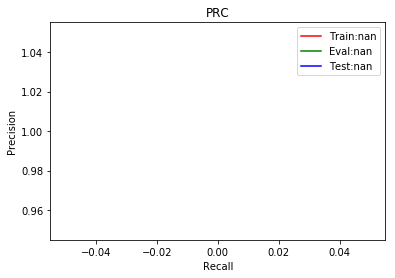

In [24]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.5,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.5,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.5,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

In [25]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.5,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.5,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.5,test_pred)

auroc_train=roc_auc_score(train_y>=0.5,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.5,eval_pred)
auroc_test=roc_auc_score(test_y>=0.5,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

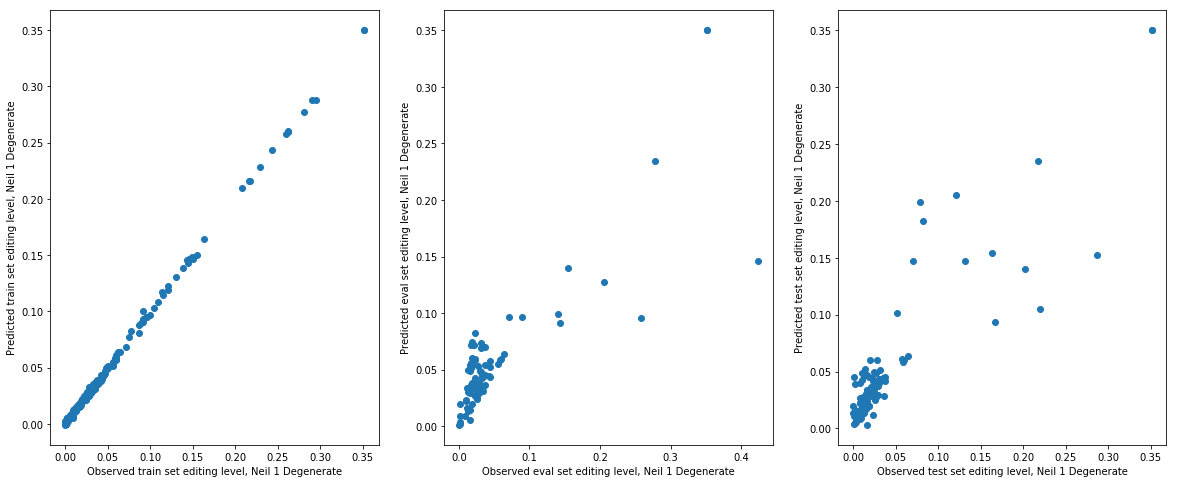

In [26]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted train set editing level, Neil 1 Degenerate")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted eval set editing level, Neil 1 Degenerate")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted test set editing level, Neil 1 Degenerate")

plt.show()

In [29]:
import plotnine
from plotnine import *
test_df=pd.DataFrame({'Observed':test_y,
                     'Predicted':test_pred,
                     'Dataset':'AJUBA'})

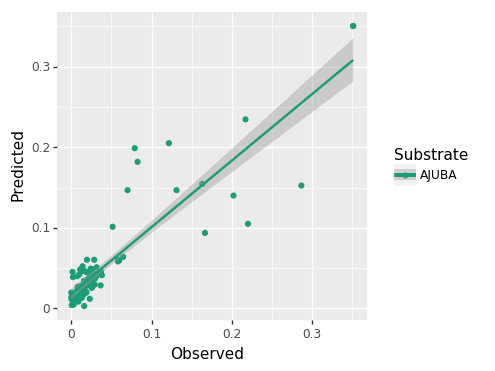

<ggplot: (-9223363257189450082)>


/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 4 x 4 in image.

/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: AJUBA.comp.substrate.svg



In [30]:
plotnine.options.figure_size = (4, 4)

p=(ggplot(test_df, aes('Observed', 'Predicted', color='factor(Dataset)'))
 + geom_point()
 + stat_smooth(method='lm')
 + scale_color_manual(values=['#1b9e77'],name="Substrate"))
print(p)
ggsave(plot=p, filename='AJUBA.comp.substrate.svg',width=4,height=4,units='in')


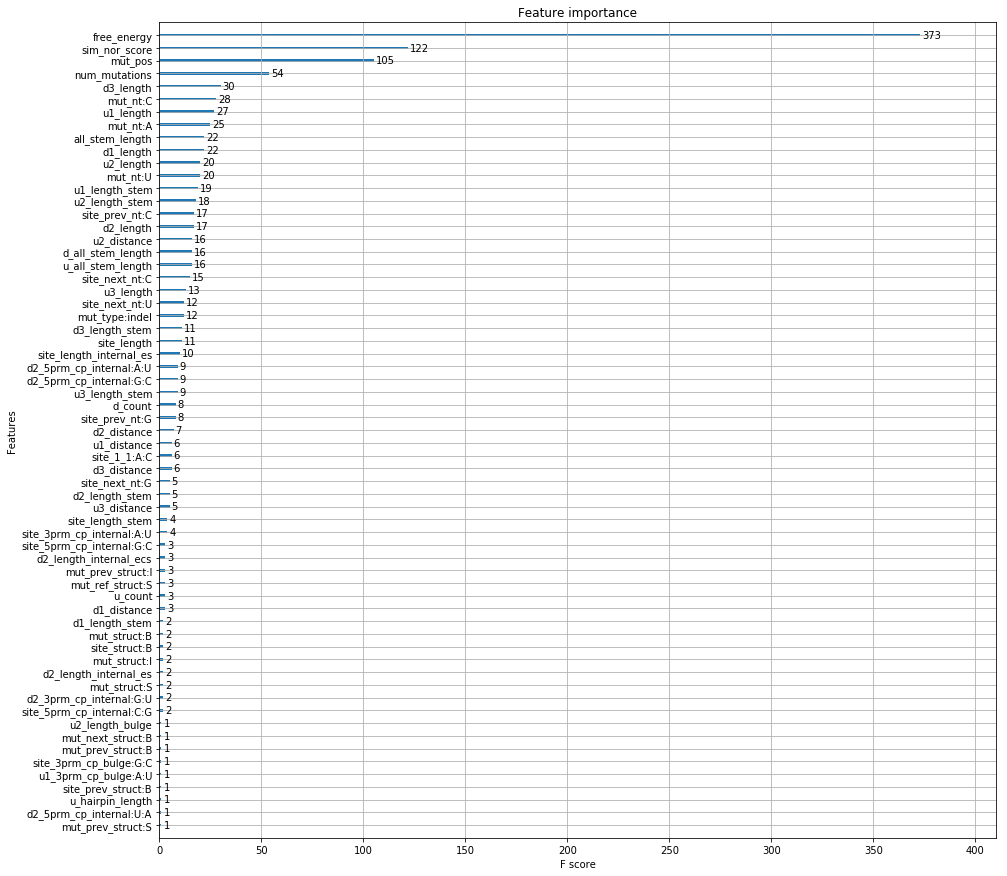

In [31]:
matplotlib.rcParams['figure.figsize'] = [15, 15]
xgboost.plot_importance(bst)

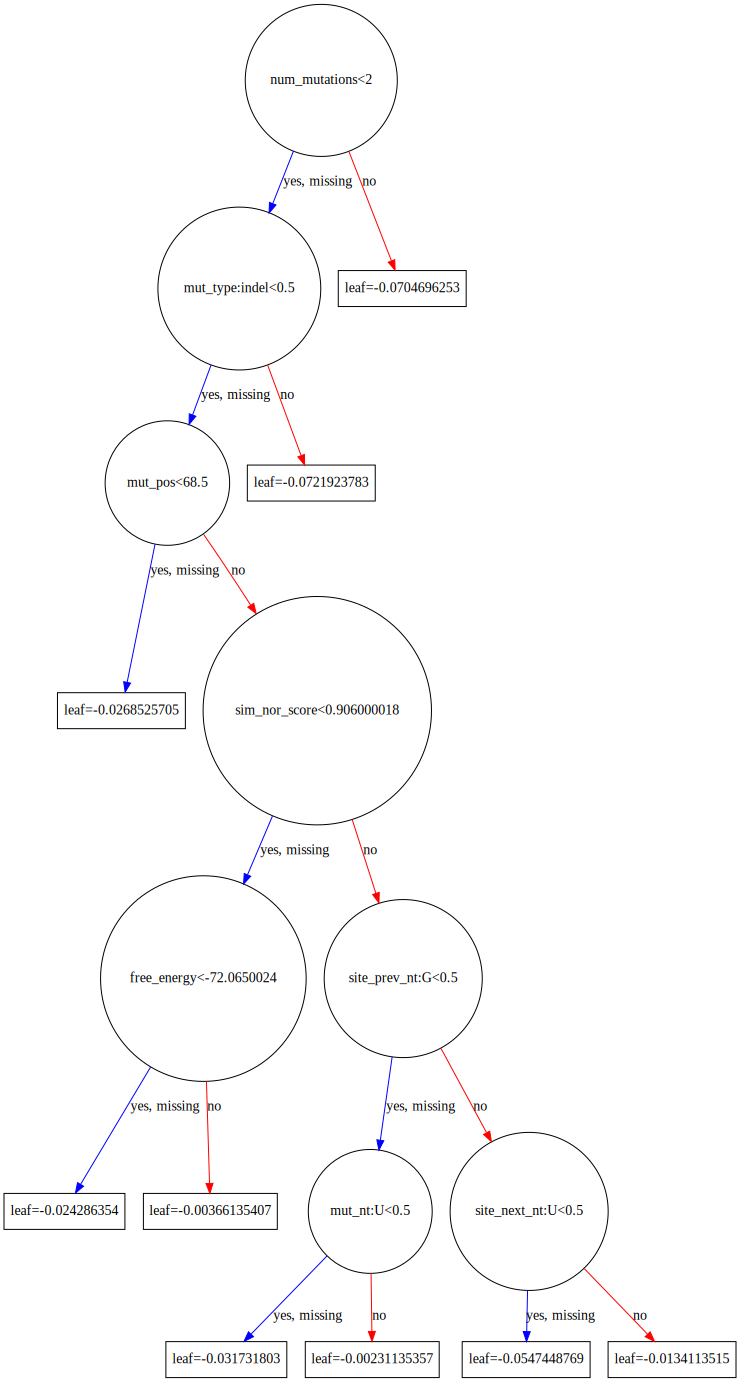

In [32]:
xgboost.to_graphviz(bst, num_trees=2)


In [33]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(test_X)
shap_values.shape

(99, 107)

In [34]:
test_y=pd.DataFrame(test_y)
max_index=test_y.index[test_y['editing_value'] == max(test_y['editing_value'])]
max_row=test_y.index.get_loc(max_index[0])
# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[max_row,:], test_X.iloc[max_row,:])

In [35]:
# visualize prediction for isoform with the lowest editing level 
shap.initjs()
min_index=test_y.index[test_y['editing_value'] == min(test_y['editing_value'])]
min_row=test_y.index.get_loc(min_index[0])
shap.force_plot(explainer.expected_value, shap_values[min_row,:], test_X.iloc[min_row,:])

In [36]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,train_X)

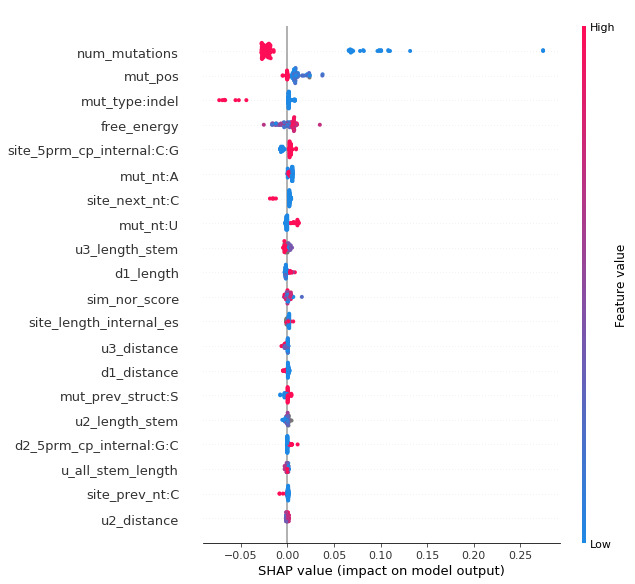

In [41]:
# summarize the effect of all the features 
# summarize the effect of all the features 
shap.summary_plot(shap_values, test_X,show=False)
plt.savefig("AJUBA.comp.shap.svg", format='svg',width=30,height=10,dpi=300,bbox_inches="tight")



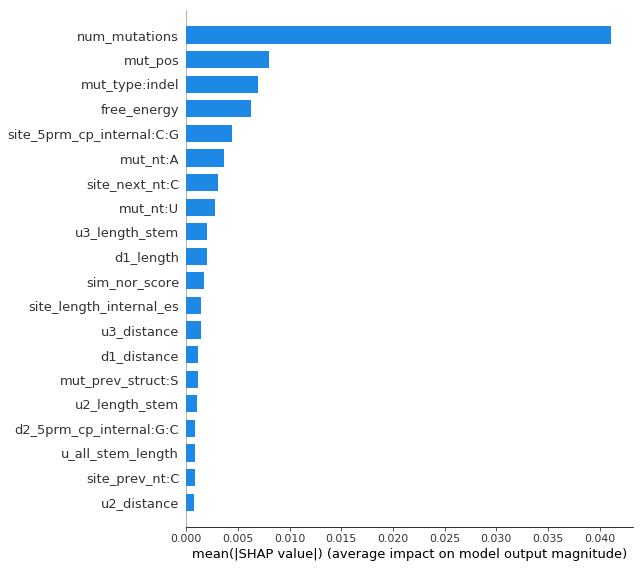

In [38]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, test_X, plot_type="bar")

In [42]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(test_X)
shap_interaction_values.shape

(99, 107, 107)

In [43]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [44]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [45]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
configure_plotly_browser_state()

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)


## Computational Dataset: Feature Subsets<a name='2'>
<a href=#outline>Home</a>

In [46]:
shap_values=pd.DataFrame(shap_values,columns=Cols)

['num_mutations$', 'mut_exist*', 'mut_type*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_ref_struct*', 'mut_nt*', 'mut_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*']


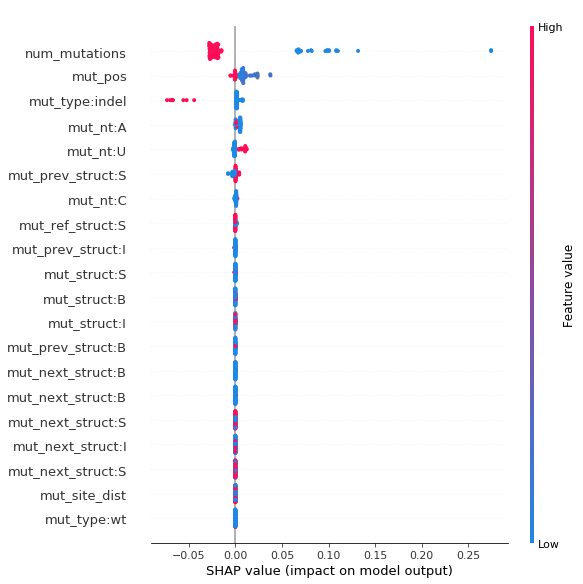

Contribution/Total:0.6417772
['site_struct*', 'site_prev_nt*', 'site_next_nt*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1_internal*', 'site_length$', 'site_length_stem$', 'site_length_hairpin$', 'site_length_bulge$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


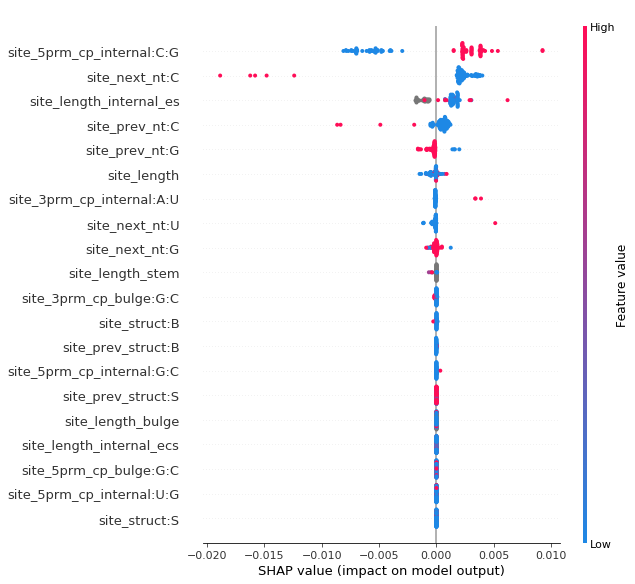

Contribution/Total:0.108936846
['u_count$', 'u_all_stem_length$', 'u_hairpin_length$', 'u1_exist*', 'u1_distance$', 'u1_struct*', 'u1_length$', 'u1_length_stem$', 'u1_length_hairpin$', 'u1_length_bulge$', 'u1_length_internal_es$', 'u1_length_internal_ecs$', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance$', 'u2_struct*', 'u2_length$', 'u2_length_stem$', 'u2_length_hairpin$', 'u2_length_bulge$', 'u2_length_internal_es$', 'u2_length_internal_ecs$', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length$', 'u3_length_stem$', 'u3_length_hairpin$', 'u3_length_bulge$', 'u3_length_internal_es$', 'u3_length_internal_ecs$', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*']


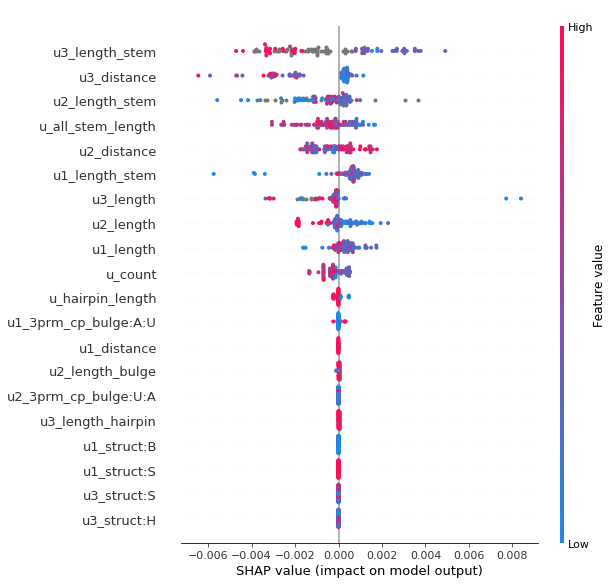

Contribution/Total:0.08987126
['d_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length$', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_struct*', 'd2_length$', 'd2_length_stem*', 'd2_length_hairpin*', 'd2_length_bulge*', 'd2_length_internal_es*', 'd2_length_internal_ecs*', 'd2_5prm_cp_hairpin*', 'd2_5prm_cp_bulge*', 'd2_3prm_cp_bulge*', 'd2_5prm_cp_internal*', 'd2_3prm_cp_internal*', 'd3_exist*', 'd3_distance*', 'd3_struct*', 'd3_length$', 'd3_length_stem*', 'd3_length_hairpin*', 'd3_length_bulge*', 'd3_length_internal_es*', 'd3_length_internal_ecs*', 'd3_5prm_cp_hairpin*', 'd3_5prm_cp_bulge*', 'd3_3prm_cp_bulge*', 'd3_5prm_cp_internal*', 'd3_3prm_cp_internal*']


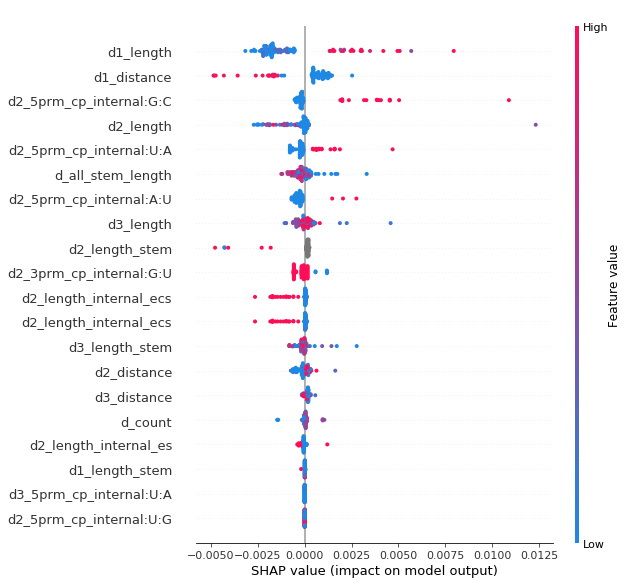

Contribution/Total:0.080957085
['u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance$', 'u1_struct*', 'u1_length$', 'u1_length_stem$', 'u1_length_hairpin$', 'u1_length_bulge$', 'u1_length_internal_es$', 'u1_length_internal_ecs$', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance$', 'u2_struct*', 'u2_length$', 'u2_length_stem$', 'u2_length_hairpin$', 'u2_length_bulge$', 'u2_length_internal_es$', 'u2_length_internal_ecs$', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length$', 'u3_length_stem$', 'u3_length_hairpin$', 'u3_length_bulge$', 'u3_length_internal_es$', 'u3_length_internal_ecs$', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*'

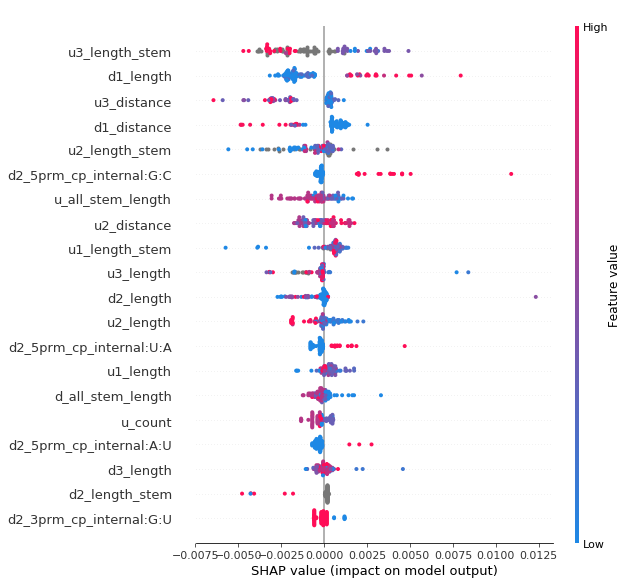

Contribution/Total:0.17082834
['num_mutations*', 'mut_exist*', 'mut_type*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_ref_struct*', 'mut_nt*', 'mut_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1_internal*', 'site_length$', 'site_length_stem$', 'site_length_hairpin$', 'site_length_bulge$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


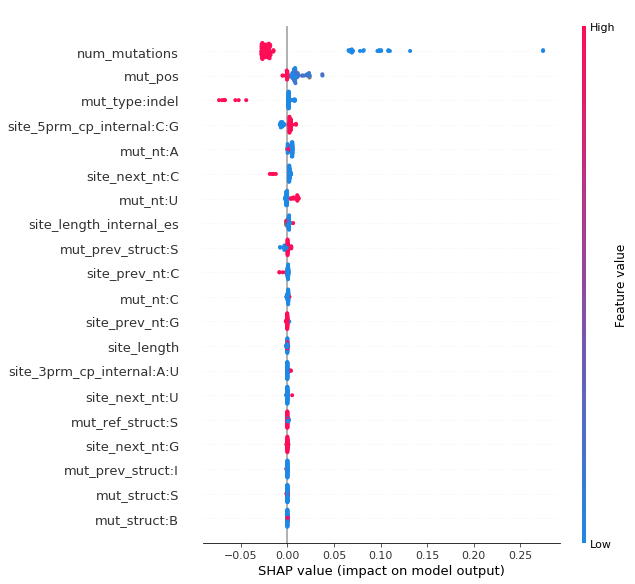

Contribution/Total:0.7505191
['num_mutations*', 'mut_exist*', 'mut_type*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_ref_struct*', 'mut_nt*', 'mut_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_struct*', 'site_prev_nt*', 'site_next_nt*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1_internal*', 'site_length$', 'site_length_stem$', 'site_length_hairpin$', 'site_length_bulge$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length$', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_struct*', 'd2_length$', 'd2_length_stem*', 'd2

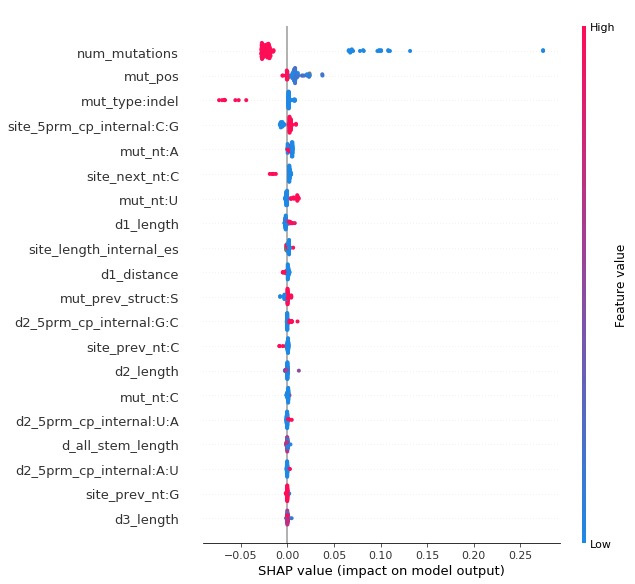

Contribution/Total:0.8316712
['num_mutations*', 'mut_exist*', 'mut_type*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_ref_struct*', 'mut_nt*', 'mut_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_struct*', 'site_prev_nt*', 'site_next_nt*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1_internal*', 'site_length$', 'site_length_stem$', 'site_length_hairpin$', 'site_length_bulge$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count$', 'u_all_stem_length$', 'u_hairpin_length$', 'u1_exist*', 'u1_distance$', 'u1_struct*', 'u1_length$', 'u1_length_stem$', 'u1_length_hairpin$', 'u1_length_bulge$', 'u1_length_internal_es$', 'u1_length_internal_ecs$', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance$', 'u2_struct*', 'u2_length$', '

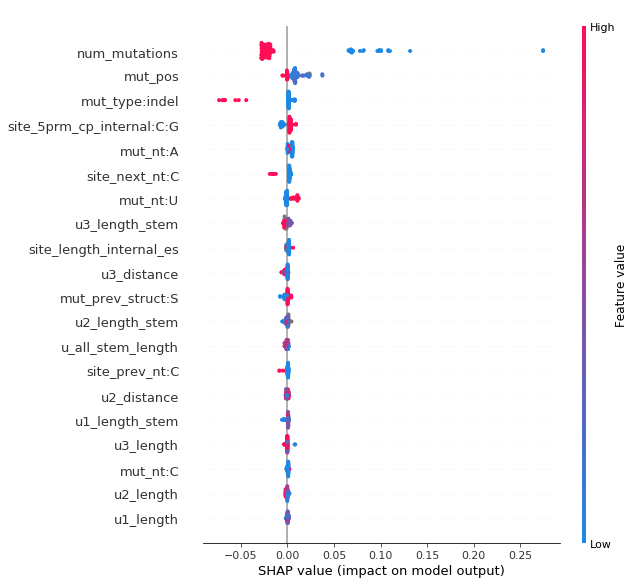

Contribution/Total:0.84058535
['site_struct$', 'site_length$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_3prm_cp_internal*']


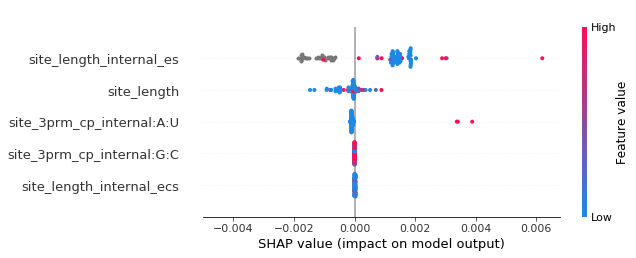

Contribution/Total:0.018753175
['site_prev_nt*', 'site_next_nt*', 'site_1_1_internal*']


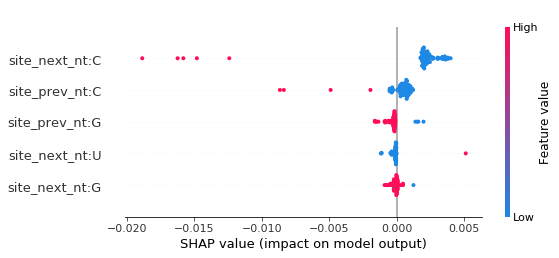

Contribution/Total:0.04545783
['num_mutations$', 'mut_pos$', 'mut_site_dist$', 'mut_ref_nt*', 'mut_nt*']


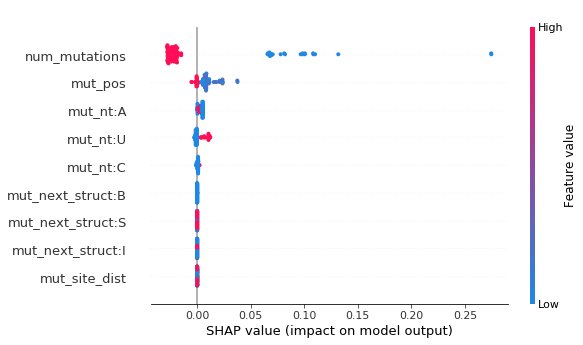

Contribution/Total:0.5580415
['site_prev_nt*', 'site_next_nt*', 'num_mutations', 'mut_pos', 'mut_site_dist', 'mut_ref_nt*', 'mut_nt*']


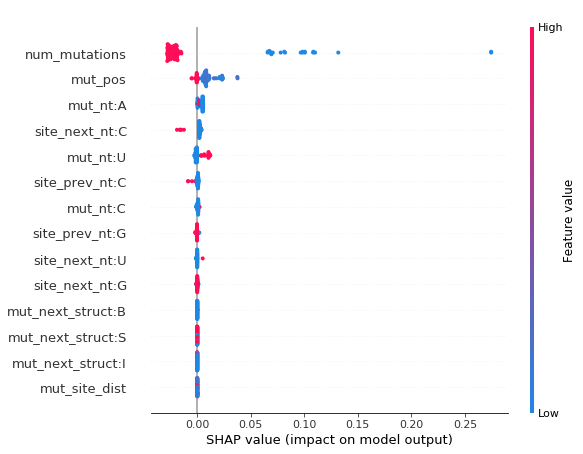

Contribution/Total:0.60349935
['free_energy*', '^all_stem_length$', 'site_struct*', 'site_prev_nt*', 'site_next_nt*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1_internal*', 'site_length$', 'site_length_stem$', 'site_length_hairpin$', 'site_length_bulge$', 'site_length_internal_es$', 'site_length_internal_ecs$', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count$', 'u_all_stem_length$', 'u_hairpin_length$', 'u1_exist*', 'u1_distance$', 'u1_struct*', 'u1_length$', 'u1_length_stem$', 'u1_length_hairpin$', 'u1_length_bulge$', 'u1_length_internal_es$', 'u1_length_internal_ecs$', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance$', 'u2_struct*', 'u2_length$', 'u2_length_stem$', 'u2_length_hairpin$', 'u2_length_bulge$', 'u2_length_internal_es$', 'u2_length_internal_ecs$', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', '

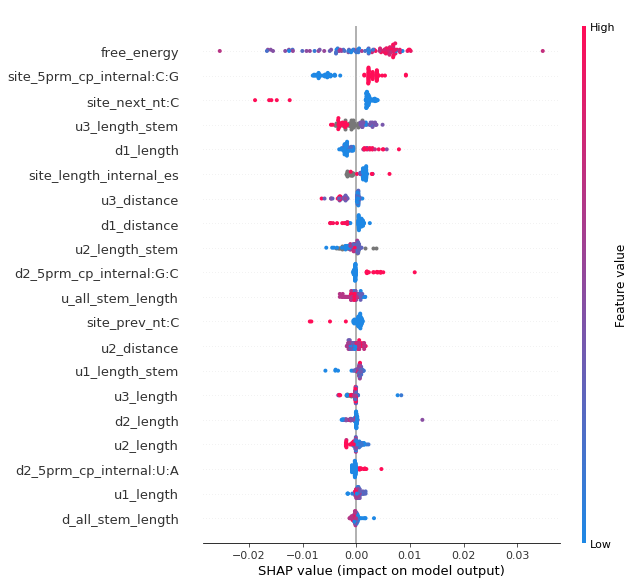

Contribution/Total:0.34321165
['free_energy*', '^all_stem_length$']


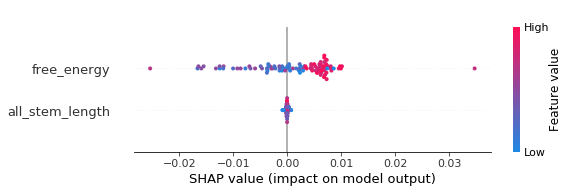

Contribution/Total:0.063446485


In [53]:
from feature_subsets import * 
subset_names=["mut","site","u","d","u_d","mut_site","no_up","no_down","site_struct","site_seq","mut_seq","mut_seq_site","no_mut","overall_structure"]
subset_contribs=[]
for subset in [mut,site,u,d,u_d,mut_site,no_up,no_down,site_struct,site_seq,mut_seq,mut_seq_site,no_mut,overall_structure]: 
  print(subset)
  cur_features=filter_features(shap_values,subset)
  cur_feature_shap=shap_values[cur_features].values 
  cur_feature_data_X=test_X[cur_features]
  shap.summary_plot(cur_feature_shap, cur_feature_data_X)#,sort=False,max_display=50)
  contrib=shap_contribs_subgroup(shap_values,subset)
  subset_contribs.append(contrib)
  print("Contribution/Total:"+str(contrib))

In [54]:
subset_contrib_df=pd.DataFrame({'Subset':subset_names,
                               'Contribution':[100*i for i in subset_contribs]})

In [55]:
subset_contrib_df=subset_contrib_df.sort_values(by=['Contribution'],ascending=False)
subset_contrib_df.reset_index(inplace=True, drop=True) 

In [56]:
from pandas.api.types import CategoricalDtype

In [57]:
subset_cat = CategoricalDtype(categories=list(subset_contrib_df['Subset']), ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string.
subset_contrib_df['Subset_Cat'] = subset_contrib_df['Subset'].astype(str).astype(subset_cat)

/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 5 x 4 in image.

/users/annashch/miniconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: AJUBA.comp.subset.importance.svg



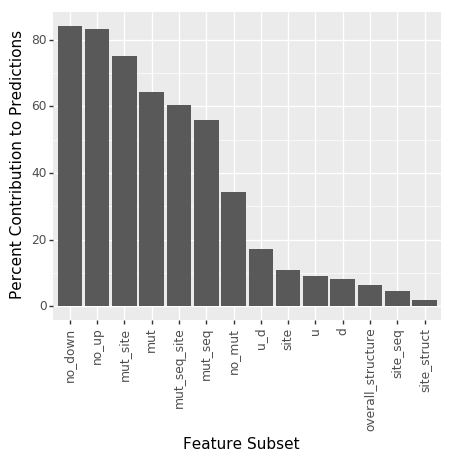

<ggplot: (-9223363257246807457)>

In [58]:
p=(ggplot(subset_contrib_df, aes('Subset_Cat', 'Contribution'))
 + geom_bar(stat='identity')
 + xlab("Feature Subset")
 + ylab("Percent Contribution to Predictions")
 + theme(axis_text_x=element_text(angle=90))
)
ggsave(plot=p, filename='AJUBA.comp.subset.importance.svg',width=5,height=4,units='in')
p

## No "mut" features <a name='3'>
<a href=#outline>Home</a>    

In [6]:
## Read in the data 
import pandas as pd 
data=pd.read_csv("../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)
#drop all mut features
cur_features=filter_features(data,feature_subsets.mut)
cur_features.remove('mut_pos')
data=data.drop(cur_features,axis=1)
data.head


<bound method NDFrame.head of               editing_value  free_energy  mut_pos mut_ref_struct  \
rna_id                                                             
AJUBA_BC_000       0.351000       -70.57      NaN            NaN   
AJUBA_BC_001       0.281000       -69.67     84.0              I   
AJUBA_BC_002       0.205000       -67.58     83.0              S   
AJUBA_BC_003       0.099000       -67.71     82.0              S   
AJUBA_BC_004       0.074500       -67.57     81.0              S   
AJUBA_BC_005       0.091500       -67.67     80.0              S   
AJUBA_BC_006       0.351000       -70.57      NaN            NaN   
AJUBA_BC_007       0.144500       -68.45     78.0              S   
AJUBA_BC_008       0.148500       -69.86     77.0              I   
AJUBA_BC_009       0.154500       -67.25     76.0              S   
AJUBA_BC_010       0.216000       -67.50     75.0              S   
AJUBA_BC_011       0.290000       -67.45     73.0              S   
AJUBA_BC_012      

In [0]:
#remove any null editing level values 
data=data[~data["editing_value"].isnull().values]

In [8]:
data=format_for_xgboost(data)
train_split,eval_split,test_split=split_train_test_eval_by_mut_pos(data)

(482, 157)
{64.0: 22, 65.0: 21, 66.0: 22, 67.0: 22, 68.0: 22, 69.0: 23, 70.0: 23, 71.0: 24, 72.0: 23, 73.0: 33, 75.0: 33, 76.0: 24, 77.0: 24, 78.0: 23, 79.0: 23, 80.0: 22, 81.0: 22, 82.0: 22, 83.0: 22, 84.0: 22, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 10}


In [0]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [0]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [11]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
to_drop.append("mut_pos")
print("\n".join(to_drop))

site_next_struct:S
u1_5prm_cp_hairpin
u3_5prm_cp_internal
u3_length_internal_es
u2_length_internal_ecs
d1_length_bulge
d2_3prm_cp_internal:A:U
site_next_struct:B
d2_3prm_cp_bulge
site_prev_nt:A
site_5prm_cp_bulge:C:G
site_3prm_cp_bulge:A:U
u1_length_hairpin
u1_3prm_cp_bulge:U:A
d1_exist
u1_5prm_cp_bulge:U:A
d3_length_hairpin
u3_3prm_cp_bulge:C:G
u3_3prm_cp_bulge:U:A
site_5prm_cp_bulge:A:U
u2_5prm_cp_internal
site_length_hairpin
d1_length_internal_ecs
u2_3prm_cp_internal
u1_5prm_cp_internal
d2_5prm_cp_bulge
d1_struct:S
u3_3prm_cp_internal
u3_5prm_cp_bulge:G:C
d3_5prm_cp_bulge
d1_5prm_cp_bulge:C:G
d2_3prm_cp_internal:U:A
u2_length_internal_es
mut_ref_struct:I
d1_5prm_cp_internal:G:C
d1_length_hairpin
site_5prm_cp_hairpin
d2_length_bulge
site_next_nt:A
d1_5prm_cp_internal:A:U
site_prev_nt:U
d1_length_internal_es
d1_3prm_cp_internal:G:C
d2_length_hairpin
u1_exist
d2_exist
d1_5prm_cp_hairpin
u3_length_internal_ecs
d1_3prm_cp_bulge:G:U
site_3prm_cp_bulge:G:U
d1_struct:B
site_next_struct:I
u1

In [0]:
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [0]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)

eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)

test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [14]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(326, 86)
(326,)
(77, 86)
(77,)
(99, 86)
(99,)


In [0]:
## format matrixes for xgboost 
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [0]:
## set model training parameters 
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 
param['eval_metric'] = ['auc','mae','map','aucpr','rmse']

In [0]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [18]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[01:25:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[0]	eval-auc:0.5	eval-mae:0.310606	eval-map:1	eval-aucpr:0.052786	eval-rmse:0.319862	train-auc:0.5	train-mae:0.323906	train-map:1	train-aucpr:0.037883	train-rmse:0.328786
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[01:25:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1]	eval-auc:0.5	eval-mae:0.221073	eval-map:1	eval-aucpr:0.052786	eval-rmse:0.227656	train-auc:0.5	train-mae:0.228524	train-map:1	train-aucpr:0.037883	train-rmse:0.233941
[01:25:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[2]	eval-auc:0.675837	eval-mae:0.160255	eval-map:1	eval-aucpr:0.13772	eval-rmse:0.165553	train-auc:0.665626	train-mae:0.162898	train-map:1	train-a

In [0]:
# save to binary file for faster loading
bst.save_model('neil1.computational.model')
# save model to text file 
bst.dump_model('neil1.computational.raw.txt')


In [0]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [21]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9959700328458325, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9242915360579707, pvalue=4.2098833510660935e-33)
Test:SpearmanrResult(correlation=0.8331580862274021, pvalue=1.075948927770595e-26)


Pearson correlation:
Train:(0.9993402648488853, 0.0)
Eval:(0.7763798292331332, 1.08018982543521e-16)
Test:(0.8477055692638008, 1.859313541604869e-28)


In [22]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0012870204609127572
MAE Eval:0.017946430369954632
MAE Test:0.014761993402048439


In [23]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:3.560743855138166%
MAPE Eval:17.870577338005827%
MAPE Test:21.961052592366133%


In [24]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0022682331533129306
RMSE Eval:0.054179176878942664
RMSE Test:0.03643449007595299


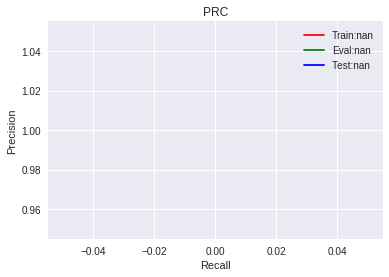

In [25]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.5,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.5,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.5,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

In [26]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.5,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.5,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.5,test_pred)

auroc_train=roc_auc_score(train_y>=0.5,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.5,eval_pred)
auroc_test=roc_auc_score(test_y>=0.5,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

ValueError: ignored

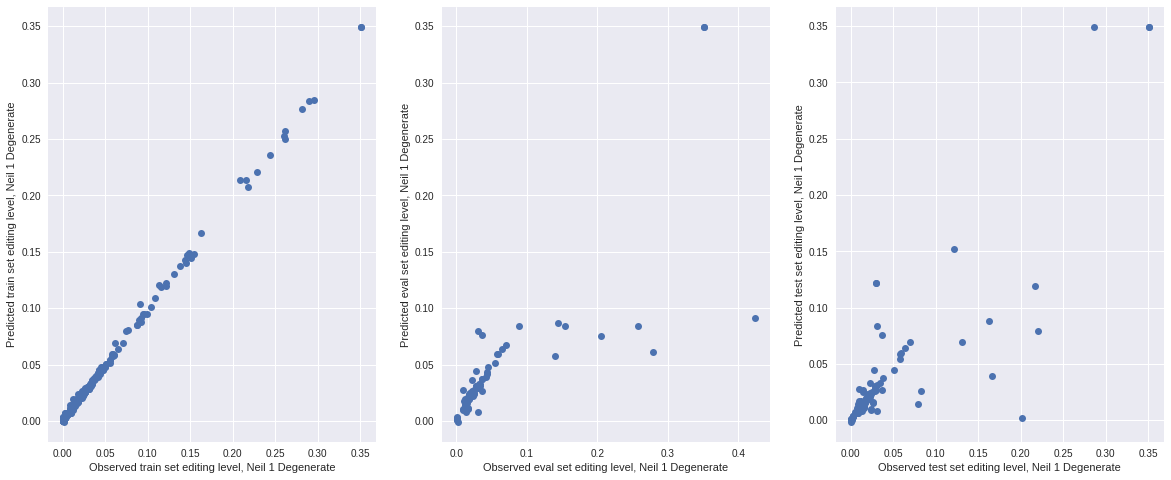

In [27]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted train set editing level, Neil 1 Degenerate")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted eval set editing level, Neil 1 Degenerate")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted test set editing level, Neil 1 Degenerate")

plt.show()

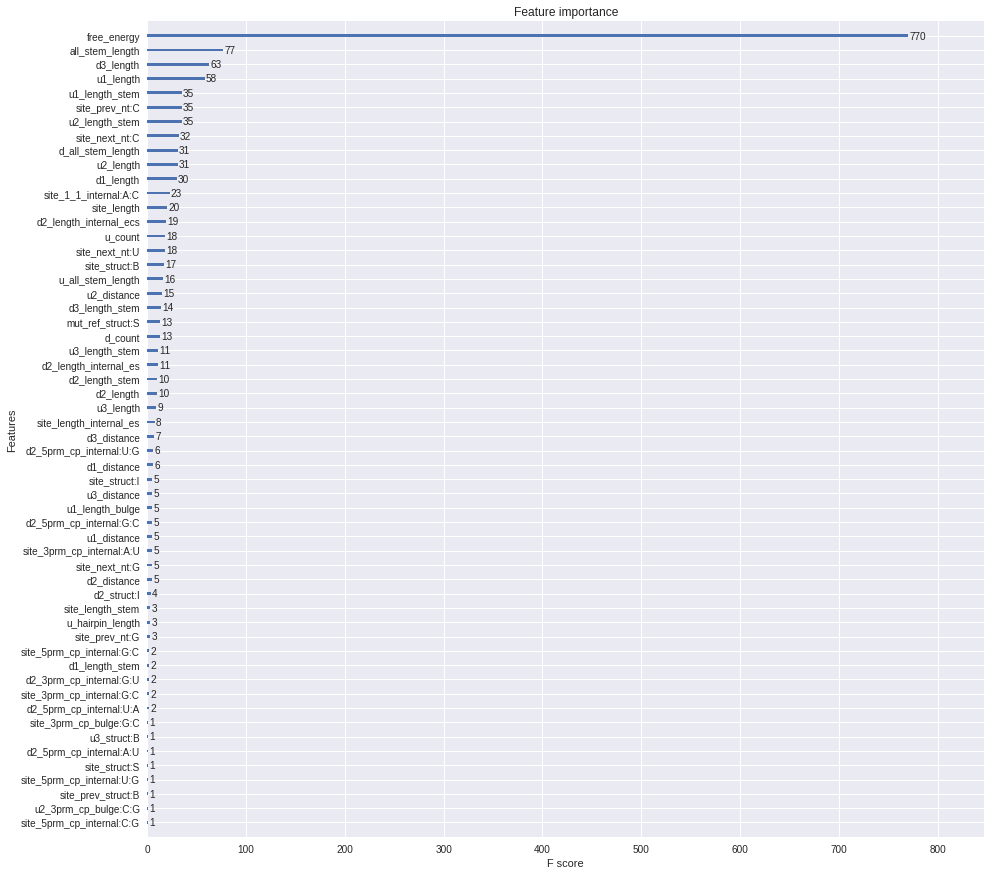

In [28]:
matplotlib.rcParams['figure.figsize'] = [15, 15]
xgboost.plot_importance(bst)

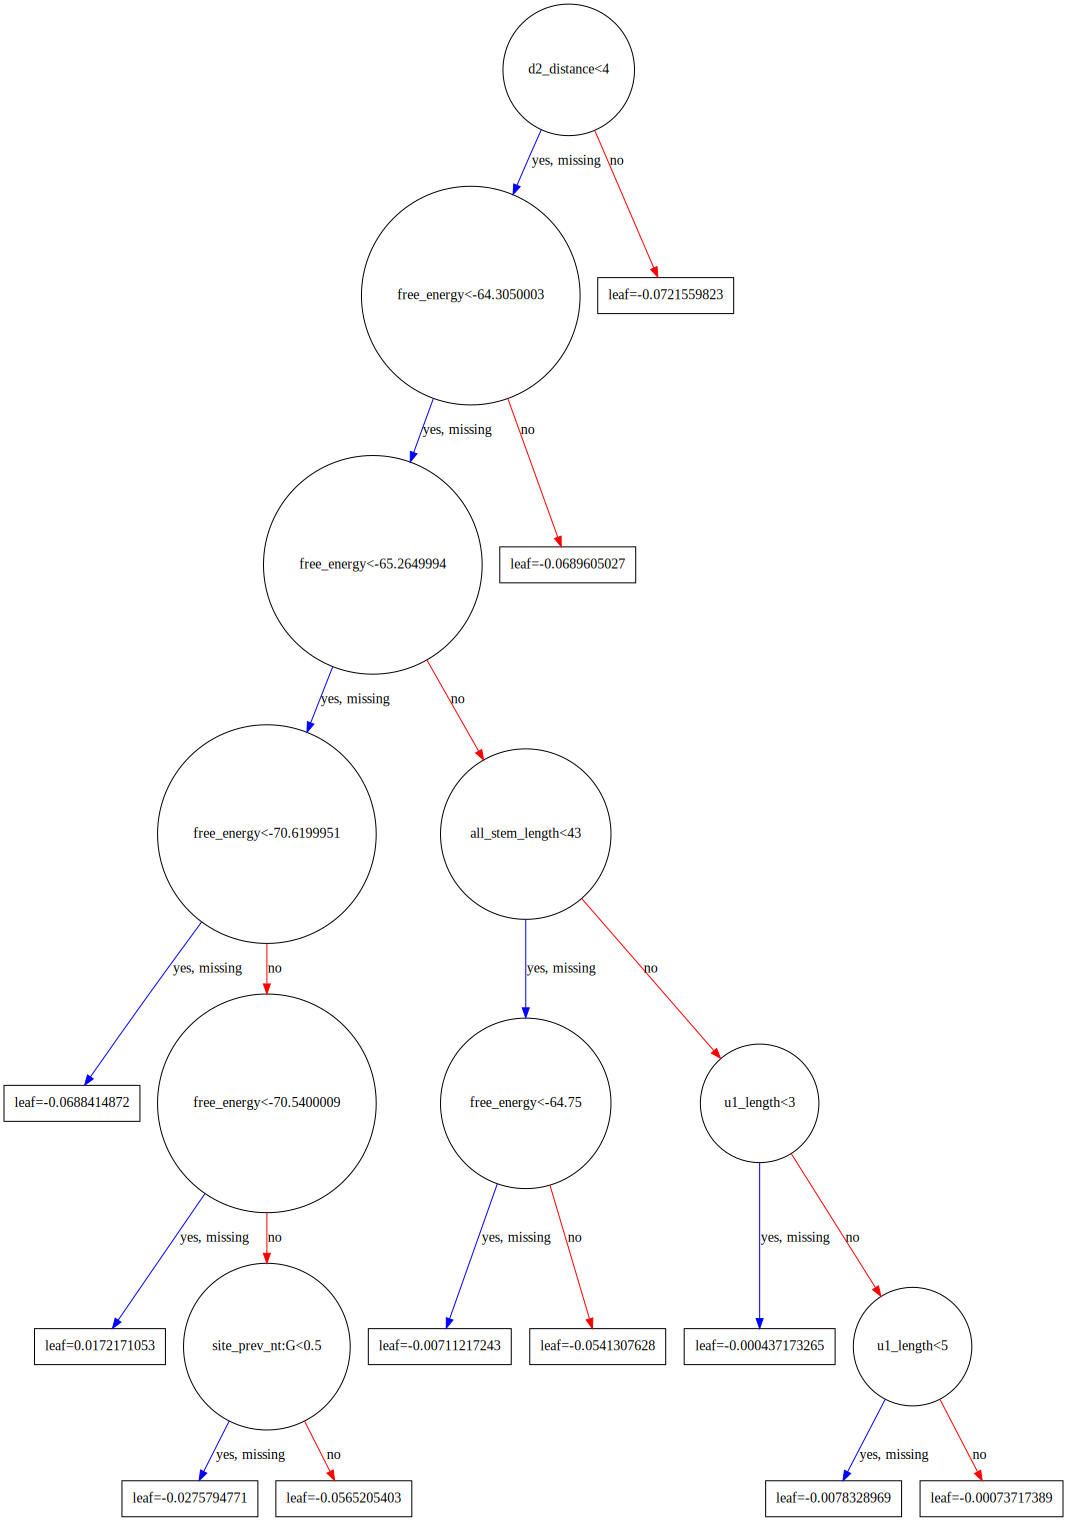

In [29]:
xgboost.to_graphviz(bst, num_trees=2)


In [30]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(test_X)
shap_values.shape

(99, 86)

In [31]:
test_y=pd.DataFrame(test_y)
max_index=test_y.index[test_y['editing_value'] == max(test_y['editing_value'])]
max_row=test_y.index.get_loc(max_index[0])
# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[max_row,:], test_X.iloc[max_row,:])

In [32]:
# visualize prediction for isoform with the lowest editing level 
shap.initjs()
min_index=test_y.index[test_y['editing_value'] == min(test_y['editing_value'])]
min_row=test_y.index.get_loc(min_index[0])
shap.force_plot(explainer.expected_value, shap_values[min_row,:], test_X.iloc[min_row,:])

In [33]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,train_X)

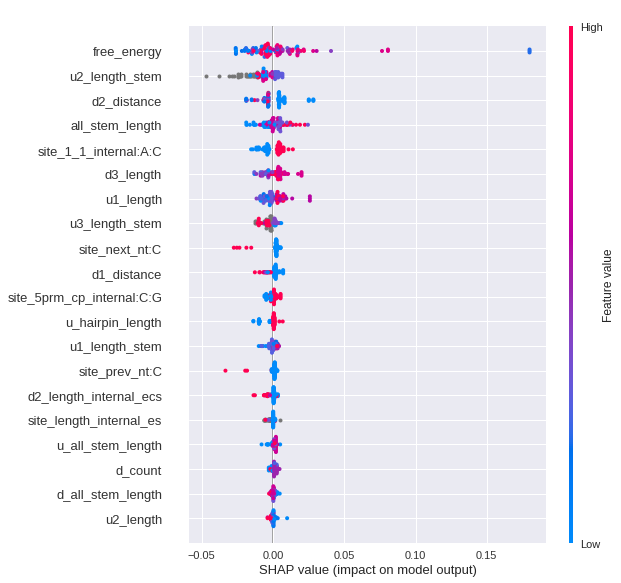

In [34]:
# summarize the effect of all the features 
shap.summary_plot(shap_values, test_X)


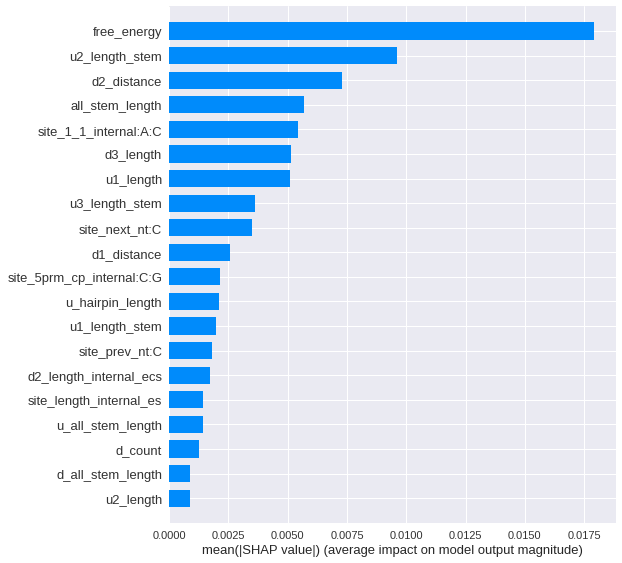

In [35]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, test_X, plot_type="bar")

In [36]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(test_X)
shap_interaction_values.shape

(99, 86, 86)

In [0]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [0]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [39]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
configure_plotly_browser_state()

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)
